<a href="https://colab.research.google.com/github/vishymails/cyber_security_AIML/blob/main/Day1_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Analyzing Time Series Using Statsmodels

In [2]:
from random import random

time_series = [2 * x + random() for x in range(1, 100)]

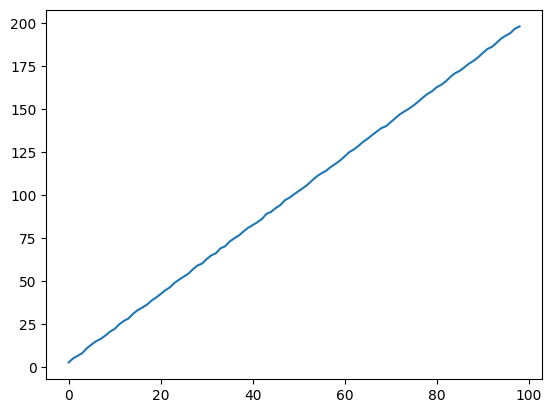

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

In [7]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series , 2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))

print(y)

[200.2815657]


In [8]:
model_fit.params

array([2.7503246 , 0.6198164 , 0.38019616])

In [17]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order = (0, 1, 2))

model_fit  = model.fit()

y = model_fit.predict(len(time_series), len(time_series))

print(y)

[198.16737033]


In [18]:
model_fit.params

array([0.89715642, 0.57444483, 1.23680021])

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -150.067
Date:                Mon, 15 Apr 2024   AIC                            306.134
Time:                        09:09:54   BIC                            313.889
Sample:                             0   HQIC                           309.271
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8972      0.092      9.718      0.000       0.716       1.078
ma.L2          0.5744      0.095      6.069      0.000       0.389       0.760
sigma2         1.2368      0.210      5.881      0.000       0.825       1.649
===================================================================================
Ljung-Box (L1) (Q):                  33.54   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.00   Prob(JB):                         0.76
Heteroskedasticity (H):               0.69   Skew:                             0.15
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Anomally Detection with Isolation Forest

In [32]:
import numpy as np
import pandas as pd


random_seed = np.random.RandomState(12)

In [33]:
X_train = 0.5 * random_seed.randn(500, 2)

X_train = np.r_[X_train + 3 , X_train]


X_train = pd.DataFrame(X_train, columns = ["x", "y"])


X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [34]:
X_test = 0.5 * random_seed.randn(500, 2)

X_test = np.r_[X_test + 3 , X_test]


X_test = pd.DataFrame(X_test, columns = ["x", "y"])


X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [37]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50,2))

X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

X_outliers.head()

,x,y
0,-2.763810,-4.040638
1,3.716652,-2.261580
2,4.168199,3.066528
3,3.686773,-1.612318
4,0.271531,2.587032


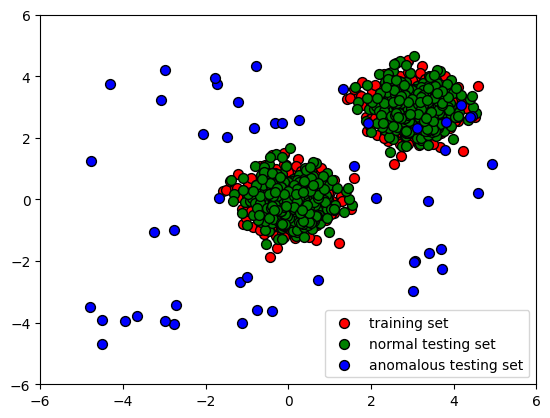

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c = "red", s= 50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c = "green", s= 50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c = "blue", s= 50, edgecolor="black")


plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend([p1, p2, p3],
      ["training set", "normal testing set", "anomalous testing set"],
      loc = "lower right",)

plt.show()

In [39]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)




In [40]:
X_outliers = X_outliers.assign(pred = y_pred_outliers)

X_outliers.head()

,x,y,pred
0,-2.763810,-4.040638,-1
1,3.716652,-2.261580,-1
2,4.168199,3.066528,-1
3,3.686773,-1.612318,-1
4,0.271531,2.587032,-1


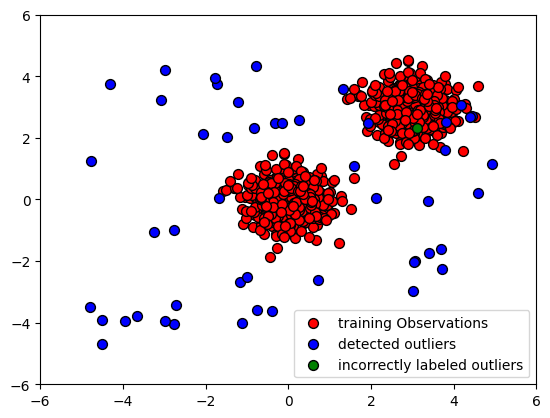

In [43]:
p1 = plt.scatter(X_train.x, X_train.y, c = "red", s= 50, edgecolor="black")

p2 = plt.scatter( X_outliers.loc[X_outliers.pred == -1, ["x"]],
                  X_outliers.loc[X_outliers.pred == -1, ["y"]],
                  c = "blue", s= 50, edgecolor="black")

p3 = plt.scatter( X_outliers.loc[X_outliers.pred == 1, ["x"]],
                  X_outliers.loc[X_outliers.pred == 1, ["y"]],
                  c = "green", s= 50, edgecolor="black")

plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend([p1, p2, p3],
      ["training Observations ", "detected outliers", "incorrectly labeled outliers"],
      loc = "lower right",)

plt.show()


In [44]:
X_test = X_test.assign(pred = y_pred_test)

X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


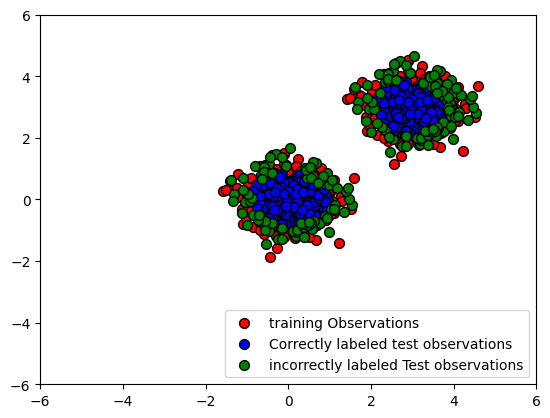

In [46]:
p1 = plt.scatter(X_train.x, X_train.y, c = "red", s= 50, edgecolor="black")

p2 = plt.scatter( X_test.loc[X_test.pred == 1, ["x"]],
                  X_test.loc[X_test.pred == 1, ["y"]],
                  c = "blue", s= 50, edgecolor="black")

p3 = plt.scatter( X_test.loc[X_test.pred == -1, ["x"]],
                  X_test.loc[X_test.pred == -1, ["y"]],
                  c = "green", s= 50, edgecolor="black")

plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend([p1, p2, p3],
      ["training Observations ", "Correctly labeled test observations", "incorrectly labeled Test observations"],
      loc = "lower right",)

plt.show()
